In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
defect_dict = load_tensors_all('./Data/For_Andy11.24/Conn2/', width=128)

(214, 215, 70)
(67, 215, 70)
(79, 215, 70)
(48, 55, 209)
(10, 55, 209)
(13, 55, 209)
(28, 328, 81)
(72, 328, 81)
(65, 328, 81)


In [3]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 596
number of class 0: 290
	number of SN: 14
number of class 1: 157
	number of SN: 5
number of class 2: 149
	number of SN: 5


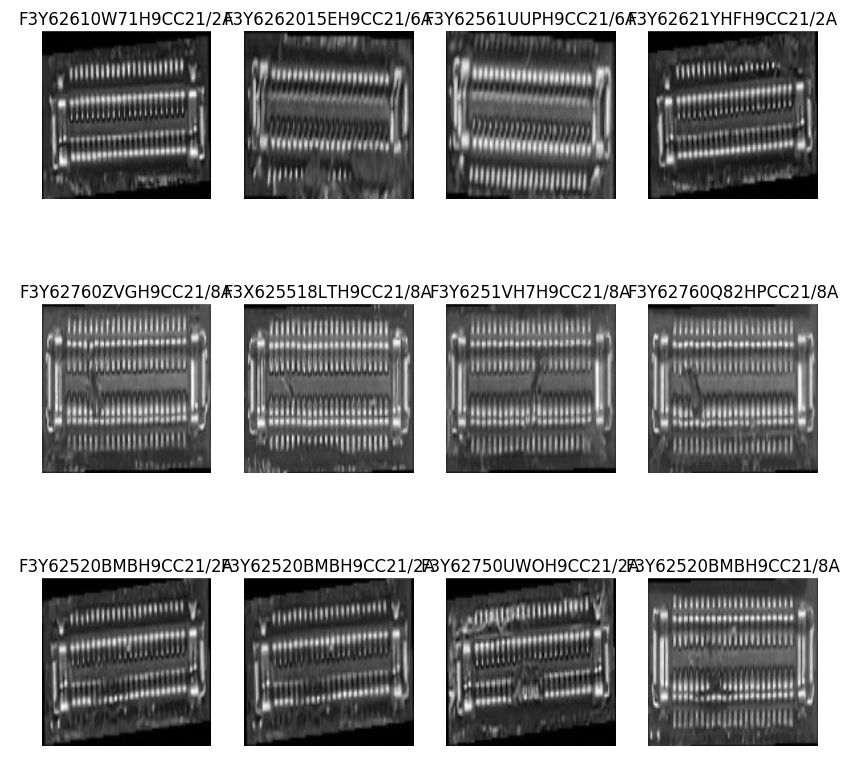

In [27]:
display_tensor(tensors, labels, sns)

In [26]:
from defectlib import GroupKFold_modeling

In [7]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=3, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 2
the s/n of validation image: F3Y62551RKDH9CC21
Train on 557 samples, validate on 39 samples
Epoch 1/30
557/557 [==============================] - 9s - loss: 1.0411 - acc: 0.5027 - val_loss: 1.4922 - val_acc: 0.0000e+00
Epoch 2/30
557/557 [==============================] - 9s - loss: 0.9939 - acc: 0.5637 - val_loss: 1.4000 - val_acc: 0.0000e+00
Epoch 3/30
557/557 [==============================] - 9s - loss: 0.9359 - acc: 0.6032 - val_loss: 1.1894 - val_acc: 0.4872
Epoch 4/30
557/557 [==============================] - 9s - loss: 0.8200 - acc: 0.6499 - val_loss: 1.1770 - val_acc: 0.0000e+00
Epoch 5/30
557/557 [==============================] - 8s - loss: 0.7098 - acc: 0.7110 - val_loss: 1.1228 - val_acc: 0.5128
Epoch 6/30
557/557 [==============================] - 9s - loss: 0.5628 - acc: 0.7792 - val_loss: 1.2324 - val_acc: 0.5385
Epoch 7/30
557/557 [==============================] - 9s - loss: 0.4826 - acc: 0.8205 - val_loss: 0.8909 - val_acc: 0

In [8]:
accuracy_dict

{0: 0.81674860227491808, 1: 0.58906037811210221, 2: 0.76367521367521363}

In [9]:
escape_dict

{0: 0.8167486022749181, 1: 0.3393180002662761, 2: 0.13632478632478634}

In [11]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3Y62621YHFH9CC21', 1.0, 1.0),
 (0, 'F3Y6256110XH9CC21', 0.42307692307692307, 0.4230769230769231),
 (0, 'F3X62610SZ2H9CC21', 1.0, 1.0),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3Y62570EBNH9CC21', 1.0, 1.0),
 (0, 'F3Y62611EGEH9CC21', 0.5, 0.5),
 (0, 'F3X6271269AH9CC21', 0.55000000000000004, 0.55),
 (0, 'F3X62671S1GH9CC21', 1.0, 1.0),
 (0, 'F3Y6262015EH9CC21', 0.89473684210526316, 0.8947368421052632),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (0, 'F3Y62540DMTH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3V62770TU1H9CC21', 0.066666666666666666, 0.06666666666666667),
 (1, 'F3Y62760Q82HPCC21', 0.43243243243243246, 0.4594594594594595),
 (1, 'F3Y6251VH7H9CC21', 0.88571428571428568, 0.11428571428571428),
 (1, 'F3X625518LTH9CC21', 0.5, 0.5),
 (1, 'F3Y62760ZVGH9CC21', 0.68965517241379315, 0.3103448275862069),
 (1, 'F3X62630KAXH9CC21', 0.4375, 0.3125),
 (2, 'F3Y62551RKDH9CC21', 0.84615384615384615, 0.15384615384615385),
 (2, 'F3Y62560U31

In [12]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.10526316  0.45        0.5         0.57692308
  0.93333333]
[ 0.06666667  0.42307692  0.5         0.55        0.89473684  1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0666666666667
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.244871794872
Result for label 1
[ 0.11428571  0.31034483  0.5         0.5625      0.56756757]
[ 0.11428571  0.31034483  0.3125      0.45945946  0.5       ]
	Pick 1 test
		Tight Escape rate: 0.114285714286
		Rough Escape rate: 0.114285714286
	Pick 2 test
		Tight Escape rate: 0.212315270936
		rough Escape rate: 0.212315270936
Result for label 2
[ 0.          0.          0.02777778  0.15384615  1.        ]
[ 0.          0.          0.02777778  0.15384615  0.5       ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Esc

In [14]:
tensors_k, labels_k = keras_transform(tensors, labels)

In [15]:
predict = models[0].predict_classes(tensors_k)

596/596 [==============================] - 2s     


In [16]:
from sklearn.metrics import classification_report

In [18]:
print classification_report(labels, predict)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       290
          1       1.00      1.00      1.00       149
          2       1.00      0.96      0.98       157

avg / total       0.99      0.99      0.99       596



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
print confusion_matrix(labels, predict)

[[290   0   0]
 [  0 149   0]
 [  6   0 151]]


In [22]:
6.0/157

0.03821656050955414

In [30]:
sorted?

In [35]:
sorted(accuracy_escape_list, key= lambda x: (x[0], -x[2]))

[(0, 'F3Y62621YHFH9CC21', 1.0, 1.0),
 (0, 'F3X62610SZ2H9CC21', 1.0, 1.0),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3Y62570EBNH9CC21', 1.0, 1.0),
 (0, 'F3X62671S1GH9CC21', 1.0, 1.0),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (0, 'F3Y62540DMTH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3Y6262015EH9CC21', 0.89473684210526316, 0.8947368421052632),
 (0, 'F3X6271269AH9CC21', 0.55000000000000004, 0.55),
 (0, 'F3Y62611EGEH9CC21', 0.5, 0.5),
 (0, 'F3Y6256110XH9CC21', 0.42307692307692307, 0.4230769230769231),
 (0, 'F3V62770TU1H9CC21', 0.066666666666666666, 0.06666666666666667),
 (1, 'F3Y6251VH7H9CC21', 0.88571428571428568, 0.11428571428571428),
 (1, 'F3Y62760ZVGH9CC21', 0.68965517241379315, 0.3103448275862069),
 (1, 'F3X625518LTH9CC21', 0.5, 0.5),
 (1, 'F3X62630KAXH9CC21', 0.4375, 0.3125),
 (1, 'F3Y62760Q82HPCC21', 0.43243243243243246, 0.4594594594594595),
 (2, 'F3Y62750UWOH9CC21', 1.0, 0.0),
 (2, 'F3Y62560A97H9CC21', 1.0, 0.0),
 (2, 'F3Y625

In [37]:
models[0]

In [38]:
def find_tensor(tensors, labels, sns, nb_sn):
    '''
    '''
    sn_only = np.array([x.split('/')[0] for x in sns])
    display_tensor(tensors[sn_only == nb_sn], labels[sn_only == nb_sn], sns[sn_only == nb_sn])

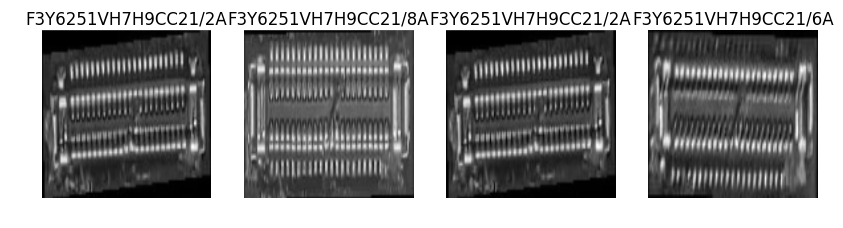

In [39]:
find_tensor(tensors, labels, sns, 'F3Y6251VH7H9CC21')

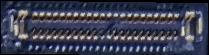

In [40]:
Image('./Data/For_Andy11.24/Conn2/6A/Conn2_6A_c1/Conn2_Recombination_F3Y6251VH7H9CC21_6A_3.jpg')

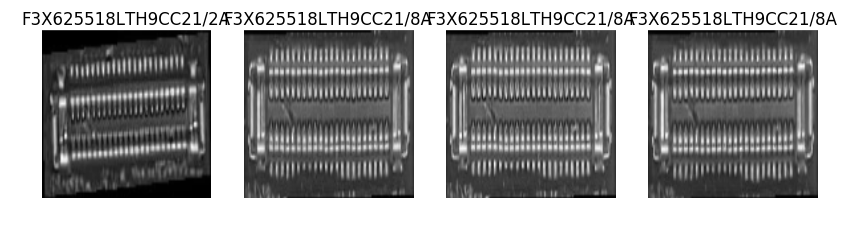

In [41]:
find_tensor(tensors, labels, sns, 'F3X625518LTH9CC21')

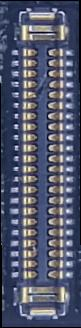

In [45]:
Image('./Data/For_Andy11.24/Conn2/8A/Conn2_8A_c1/Conn2_Recombination_F3X625518LTH9CC21_8A_3.jpg')

In [42]:
Image('./Data/For_Andy11.24/Conn2/6A/Conn2_6A_c1/Conn2_Recombination_F3X625518LTH9CC21_6A_3.jpg')